#📌 Extracão

In [3]:
# ETAPA 1 - Importar bibliotecas necessárias
import pandas as pd
import requests

# ETAPA 2 - URL dos dados (formato raw JSON)
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"

# ETAPA 3 - Requisição dos dados via API (GitHub)
response = requests.get(url)
data_json = response.json()  # Converte o JSON em dicionário Python

# ETAPA 4 - Carregar os dados em um DataFrame do Pandas
df = pd.json_normalize(data_json)  # "Explode" os dados aninhados

# ETAPA 5 - Visualizar as primeiras linhas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [4]:
url_dict = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_dicionario.md"

response_dict = requests.get(url_dict)
response_dict.raise_for_status()

dict_md = response_dict.text
print(dict_md[:500])  # exibe os primeiros 500 chars

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLin


In [5]:
# Explorar as colunas e seus tipos
print("Colunas e tipos de dados:\n")
print(df.dtypes)

# Verificar colunas aninhadas (algumas colunas são dicionários)
print("\nVisualizar uma linha para entender a estrutura:")
print(df.iloc[0])


Colunas e tipos de dados:

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

Visualizar uma linha para entender a estrutura:
customerID                     0002-ORFBO
Churn                                  No
customer.gender                    Female
custome

In [10]:
import pandas as pd
import requests

# Carregar os dados diretamente da API (link raw do GitHub)
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
data_json = response.json()  # lista de dicionários

# Flatten dos dados aninhados corretamente
df = pd.json_normalize(
    data_json,
    sep='.',  # substitui "." no nome das colunas
)

# Verificar primeiras colunas
print("Colunas carregadas:\n", df.columns.tolist())
print("Formato final do DataFrame:", df.shape)


Colunas carregadas:
 ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
Formato final do DataFrame: (7267, 21)


In [11]:
# Verificar valores ausentes
print("\n🔍 Valores ausentes por coluna:")
print(df.isnull().sum())

# Verificar valores vazios (string vazia)
print("\n🔍 Valores vazios (strings vazias):")
print((df == '').sum())

# Verificar duplicatas
print("\n🔍 Linhas duplicadas:")
print(f"Total de linhas duplicadas: {df.duplicated().sum()}")

# Verificar tipos de dados
print("\n🔍 Tipos de dados:")
print(df.dtypes)

# Verificar valores únicos das categorias principais
colunas_categoricas = [
    'Churn',
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'internet.InternetService',
    'account.Contract',
    'account.PaymentMethod'
]

print("\n🔍 Valores únicos por coluna categórica:")
for coluna in colunas_categoricas:
    if coluna in df.columns:
        print(f"{coluna}: {df[coluna].unique()}")
    else:
        print(f"{coluna}: ❌ Coluna não encontrada no DataFrame.")


🔍 Valores ausentes por coluna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

🔍 Valores vazios (strings vazias):
customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phon

In [12]:
# 🔧 1. Remover registros com Churn vazio (vazios ou nulos)
df = df[df['Churn'].notnull()]
df = df[df['Churn'] != '']

# 🔧 2. Remover linhas duplicadas, se houver
df = df.drop_duplicates()

# 🔧 3. Corrigir formatação de colunas categóricas (ex: " Yes", "No ", etc.)
colunas_categoricas = [
    'Churn',
    'customer.gender',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

for col in colunas_categoricas:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

# 🔧 4. Converter colunas numéricas (Monthly e Total Charges)
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# 🔧 5. Preencher possíveis NaNs nos valores numéricos com 0 ou média (opcional)
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# 🔧 6. Garantir que tenure e SeniorCitizen sejam inteiros
df['customer.tenure'] = df['customer.tenure'].astype(int)
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype(int)

# ✅ Mostrar resultado final
print("✔️ Dados limpos! Preview:")
df.head()


✔️ Dados limpos! Preview:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,Yes,No,Yes,Yes,No,One Year,Yes,Mailed Check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,No,No,No,Yes,Month-To-Month,No,Mailed Check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,No,Yes,No,No,No,Month-To-Month,Yes,Electronic Check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,...,Yes,Yes,No,Yes,Yes,Month-To-Month,Yes,Electronic Check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,...,No,No,Yes,Yes,No,Month-To-Month,Yes,Mailed Check,83.9,267.40


In [13]:
# Criar a coluna Contas_Diarias a partir do valor mensal
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Exibir amostra para ver se está correto
print("✔️ Coluna 'Contas_Diarias' criada com sucesso!")
df[['account.Charges.Monthly', 'Contas_Diarias']].head()


✔️ Coluna 'Contas_Diarias' criada com sucesso!


,account.Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga e análise

In [14]:
# 🔍 Estatísticas descritivas básicas das colunas numéricas
print("📊 Estatísticas descritivas gerais:")
df.describe().T

📊 Estatísticas descritivas gerais:


,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.000,1.000000
customer.tenure,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.000,72.000000
account.Charges.Monthly,7043.0,64.761692,30.090047,18.250000,35.500000,70.350,89.850,118.750000
account.Charges.Total,7043.0,2279.734304,2266.794470,0.000000,398.550000,1394.550,3786.600,8684.800000
Contas_Diarias,7043.0,2.158723,1.003002,0.608333,1.183333,2.345,2.995,3.958333


In [15]:
print("📌 Medianas:")
print(df.median(numeric_only=True))

📌 Medianas:
customer.SeniorCitizen        0.000
customer.tenure              29.000
account.Charges.Monthly      70.350
account.Charges.Total      1394.550
Contas_Diarias                2.345
dtype: float64


In [16]:
print("📌 Clientes por status de evasão (Churn):")
print(df['Churn'].value_counts())

📌 Clientes por status de evasão (Churn):
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [17]:
print("📌 Média de gasto mensal por tipo de contrato:")
print(df.groupby('account.Contract')['account.Charges.Monthly'].mean())

📌 Média de gasto mensal por tipo de contrato:
account.Contract
Month-To-Month    66.398490
One Year          65.048608
Two Year          60.770413
Name: account.Charges.Monthly, dtype: float64


In [18]:
print("📌 Desvio padrão do valor diário (Contas_Diarias):")
print(df['Contas_Diarias'].std())

📌 Desvio padrão do valor diário (Contas_Diarias):
1.0030015699226154


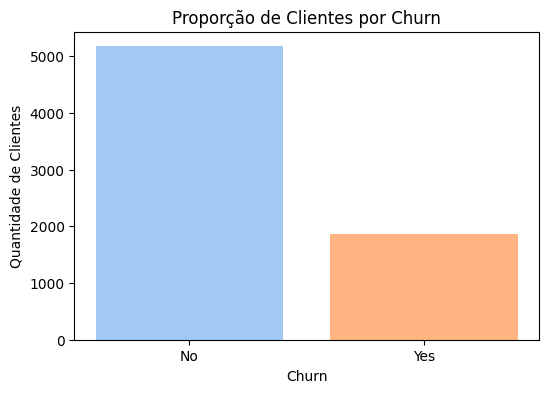

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=sns.color_palette("pastel"))
plt.title('Proporção de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')
plt.show()

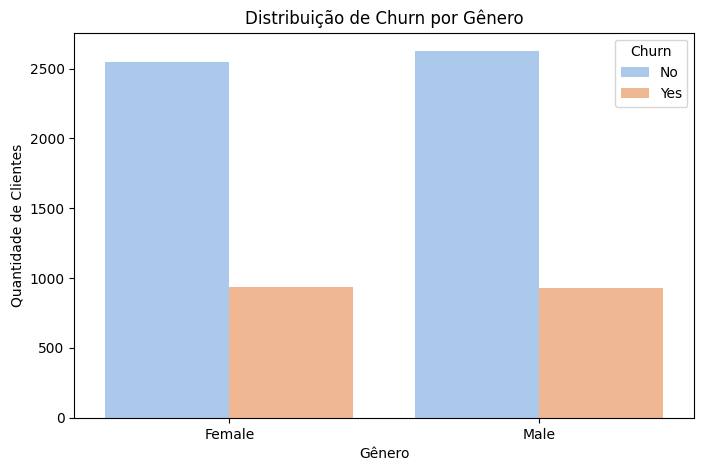

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='customer.gender', hue='Churn', data=df, palette='pastel')
plt.title('Distribuição de Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn')
plt.show()

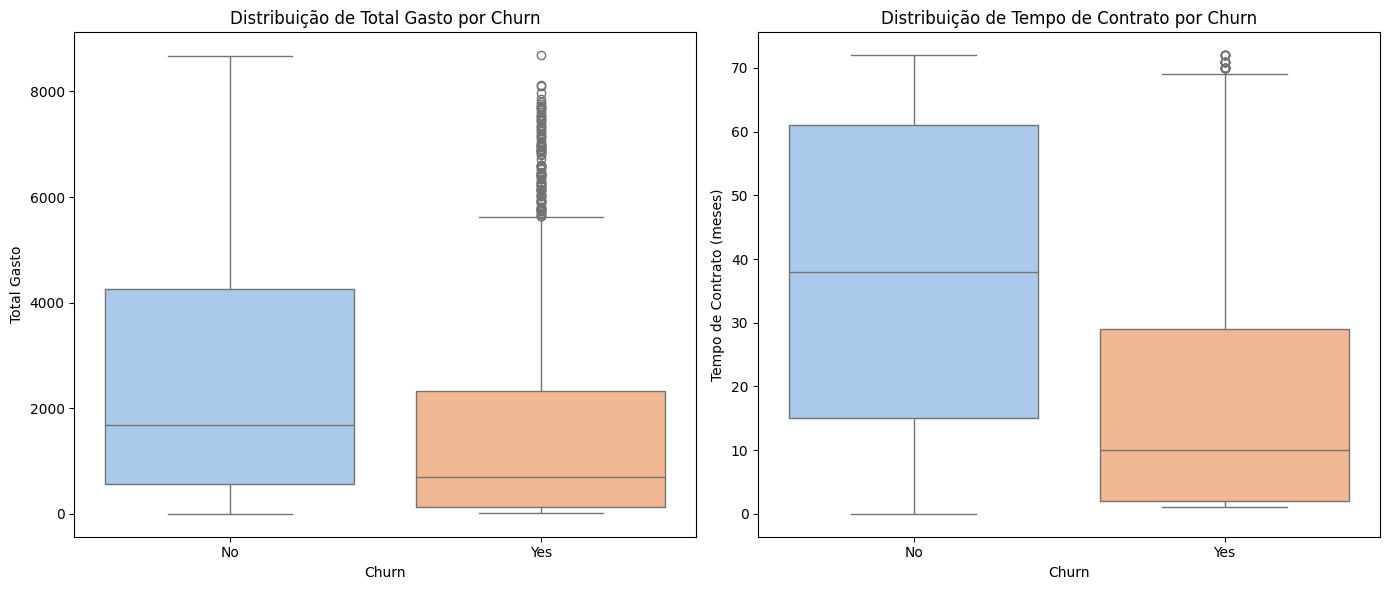

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Boxplot para total gasto
sns.boxplot(x='Churn', y='account.Charges.Total', hue='Churn', data=df, palette='pastel', ax=axes[0], legend=False)
axes[0].set_title('Distribuição de Total Gasto por Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Total Gasto')

# Boxplot para tempo de contrato
sns.boxplot(x='Churn', y='customer.tenure', hue='Churn', data=df, palette='pastel', ax=axes[1], legend=False)
axes[1].set_title('Distribuição de Tempo de Contrato por Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Tempo de Contrato (meses)')

plt.tight_layout()
plt.show()

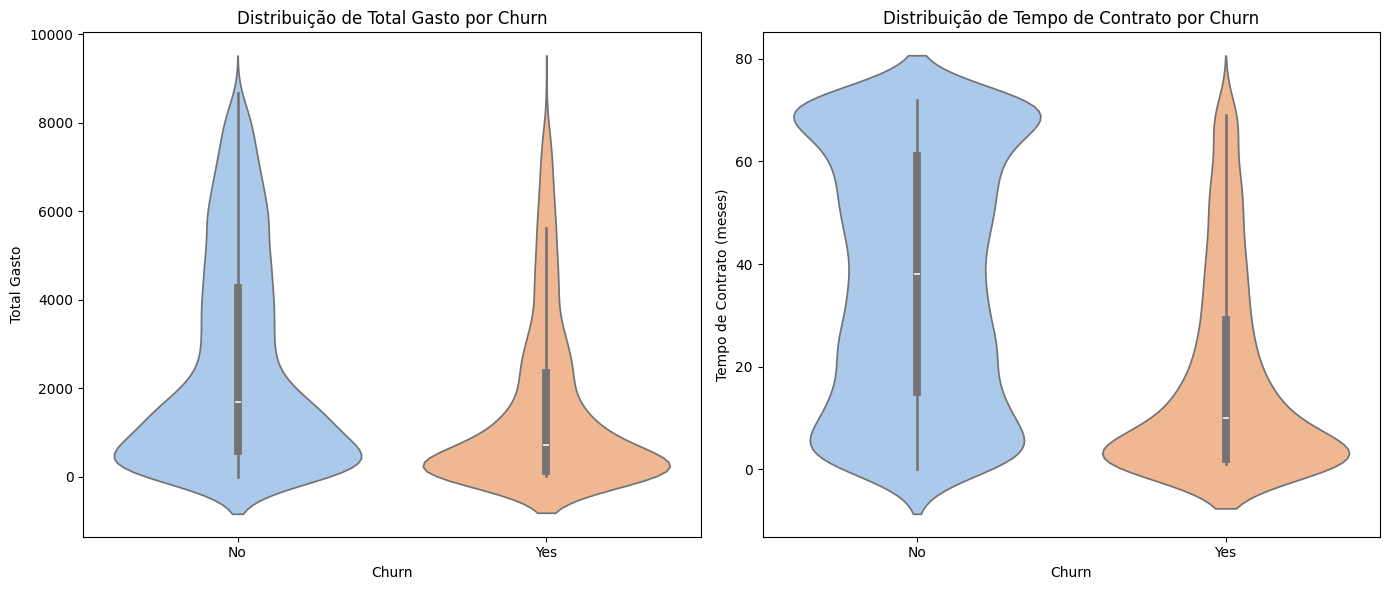

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Violinplot para total gasto
sns.violinplot(x='Churn', y='account.Charges.Total', hue='Churn', data=df, palette='pastel', ax=axes[0], legend=False)
axes[0].set_title('Distribuição de Total Gasto por Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Total Gasto')

# Violinplot para tempo de contrato
sns.violinplot(x='Churn', y='customer.tenure', hue='Churn', data=df, palette='pastel', ax=axes[1], legend=False)
axes[1].set_title('Distribuição de Tempo de Contrato por Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Tempo de Contrato (meses)')

plt.tight_layout()
plt.show()

#📄Relatorio Final

📊 Análise de Evasão de Clientes (Churn)

📌 1. Introdução

A evasão de clientes (Churn) é um dos principais desafios enfrentados por empresas prestadoras de serviços recorrentes. Compreender os fatores que influenciam o cancelamento é essencial para criar estratégias de retenção e aumentar a satisfação dos clientes.

Neste trabalho, foi realizada uma análise exploratória de dados (EDA) com o objetivo de identificar padrões e características associadas à evasão. A base de dados contém informações demográficas, contratuais, de uso e financeiras dos clientes.


🧹 2. Limpeza e Tratamento de Dados

Os principais passos executados foram:

📥 Importação dos dados e visualização inicial das colunas.

🔍 Verificação dos nomes das variáveis (ex: customer.gender, account.Charges.Total).

🧼 Ajustes nos nomes para permitir uma manipulação mais eficiente.

✅ Verificação e tratamento de valores nulos ou inconsistentes (caso existissem).

🔠 Identificação de colunas categóricas e numéricas para visualizações apropriadas.

📊 3. Análise Exploratória de Dados (EDA)

📌 3.1 Distribuição Geral de Churn

Foi analisada a proporção de clientes que cancelaram (Churn = Sim) e os que permaneceram (Churn = Não)

📌 3.2 Distribuição por Variáveis Categóricas

Gráficos foram utilizados para observar como o churn se distribui entre:

Gênero

Tipo de contrato

Método de pagamento

Essas visualizações ajudaram a entender quais perfis têm maior taxa de cancelamento.

📌 3.3 Distribuição por Variáveis Numéricas

Foram usados boxplots e violinplots para comparar:

Total Gasto

Tempo de Contrato

Essas análises mostraram que clientes que cancelam tendem a:

Ter menor tempo de contrato

Gastar menos no total

🧠 4. Conclusões e Insights

🔍 Clientes com menor tempo de contrato são mais propensos a cancelar.

💰 O churn também é mais comum entre clientes com menor valor de gasto total.

📄 Certos tipos de contrato ou métodos de pagamento apresentam maior taxa de evasão (a ser investigado mais a fundo).

👥 A variável customer.gender não apresentou diferença relevante entre os grupos de churn.

💡 5. Recomendações

Com base na análise, recomenda-se:

Implementar campanhas de fidelização voltadas a novos clientes com poucos meses de contrato.

Criar benefícios progressivos para incentivar permanência por mais tempo.

Estudar a fundo os contratos com maior churn e rever cláusulas ou benefícios.

Monitorar clientes com baixo volume de gastos e oferecer upgrades personalizados.

Utilizar os dados como base para modelos preditivos de churn com machine learning.